In [1]:
%matplotlib inline
import sys
sys.path.append("../")

import pandas as pd
import sqlite3
from volsetup.logger import logger
from volsetup import config
import operations.market_data as ddtt

globalconf = config.GlobalConfig()
log = logger("ipython")

symbols = ['ES','SPY']

expiries = ['2017-07','2017-08']


db_type = "optchain_ib"
expiry = "2017-07"
db_file = ddtt.get_market_db_file(globalconf,db_type,expiry)
path = globalconf.config['paths']['data_folder']
store = sqlite3.connect(path + db_file)
symbol = "ES"
df1 = pd.read_sql_query("SELECT * FROM " + symbol, store)
df1.sort_values(by=['current_datetime'], inplace=True)

In [2]:
import os
dir = "/home/david/data/voltrad1"    
files = [x[2] for x in os.walk(dir) if (x[2]) ][0]
filtered_files = [x for x in files if x.startswith('optchain_ib')]
filtered_files2 = [x for x in filtered_files if '2017-07' in x]

filtered_files2

['optchain_ib_expiry_2017-07.db']

In [ ]:
# transponer y poner en cada columna un precio
#                   C       ....
#                   2000.0  ...
#                   Ask    Bid IVBid IVAsk ...
# currentdatetime

In [3]:
len(df1)

84574

In [4]:
df1.columns

Index(['index', 'CallOI', 'PutOI', 'Volume', 'askDelta', 'askGamma',
       'askImpliedVol', 'askOptPrice', 'askPrice', 'askPvDividend', 'askSize',
       'askTheta', 'askUndPrice', 'askVega', 'bidDelta', 'bidGamma',
       'bidImpliedVol', 'bidOptPrice', 'bidPrice', 'bidPvDividend', 'bidSize',
       'bidTheta', 'bidUndPrice', 'bidVega', 'closePrice', 'comboLegsDescrip',
       'currency', 'current_date', 'current_datetime', 'exchange', 'expiry',
       'highPrice', 'lastDelta', 'lastGamma', 'lastImpliedVol', 'lastOptPrice',
       'lastPrice', 'lastPvDividend', 'lastSize', 'lastTheta', 'lastUndPrice',
       'lastVega', 'lowPrice', 'modelDelta', 'modelGamma', 'modelImpliedVol',
       'modelOptPrice', 'modelPvDividend', 'modelTheta', 'modelUndPrice',
       'modelVega', 'multiplier', 'right', 'secType', 'strike', 'symbol'],
      dtype='object')

In [24]:
df1['optsymbol'] = df1.right.astype(str).str.cat(df1.strike.astype(str))
df2 = df1[(df1['strike'] < 2600.0) & (df1['strike'] > 2300.0) & (df1['right'] == 'C')]
df3 = df2.pivot(index='current_datetime', columns='optsymbol', values='bidPrice')
df3.index = pd.to_datetime(df3.index, format="%Y%m%d%H%M%S")
df3 = df3.loc[:,:].apply(pd.to_numeric, errors='coerce')
df3['2017-05']

optsymbol,C2305.0,C2310.0,C2315.0,C2320.0,C2325.0,C2330.0,C2335.0,C2340.0,C2345.0,C2350.0,...,C2550.0,C2555.0,C2560.0,C2565.0,C2570.0,C2575.0,C2580.0,C2585.0,C2590.0,C2595.0
current_datetime,,,,,,,,,,,,,,,,,,,,,
2017-05-01 15:49:21,99.75,95.75,91.75,87.75,83.75,80.00,76.25,72.50,68.75,65.25,...,1.25,1.10,1.00,0.95,0.85,0.75,0.70,0.65,0.60,0.55
2017-05-01 16:49:18,100.25,96.25,92.25,88.25,84.25,80.50,76.75,73.00,69.25,65.75,...,1.20,1.10,0.95,0.90,0.80,0.75,0.65,0.60,0.55,0.55
2017-05-01 17:49:12,101.00,97.00,93.00,89.00,85.00,81.25,77.50,73.75,70.00,66.25,...,1.20,1.05,0.95,0.85,0.75,0.70,0.60,0.55,0.50,0.45
2017-05-01 18:49:17,101.25,97.25,93.00,89.25,85.25,81.25,77.50,73.75,70.00,66.50,...,1.20,1.05,0.95,0.85,0.75,0.70,0.60,0.55,0.50,0.45
2017-05-01 19:49:18,101.25,97.00,93.00,89.00,85.00,81.25,77.50,73.50,70.00,66.00,...,1.15,1.00,0.90,0.80,0.75,0.65,0.60,0.55,0.50,0.45
2017-05-01 20:49:21,102.50,98.50,94.25,90.25,86.75,82.50,78.75,75.25,71.25,67.75,...,1.25,1.15,1.00,0.90,0.85,0.75,0.70,0.65,0.60,0.55
2017-05-01 21:49:20,103.00,99.00,95.00,91.00,87.25,83.00,79.25,75.50,71.75,68.25,...,1.35,1.20,1.10,1.00,0.90,0.80,0.75,0.65,0.60,0.55
2017-05-02 15:49:18,98.50,94.50,90.50,86.50,82.75,78.75,75.00,71.25,67.75,65.50,...,1.25,1.10,1.00,0.90,0.85,0.75,0.70,0.65,0.60,0.55
2017-05-02 16:51:22,98.75,94.75,90.75,86.75,83.25,79.00,75.25,71.50,67.75,64.50,...,1.30,1.15,1.05,0.95,0.90,0.80,0.75,0.70,0.65,0.60


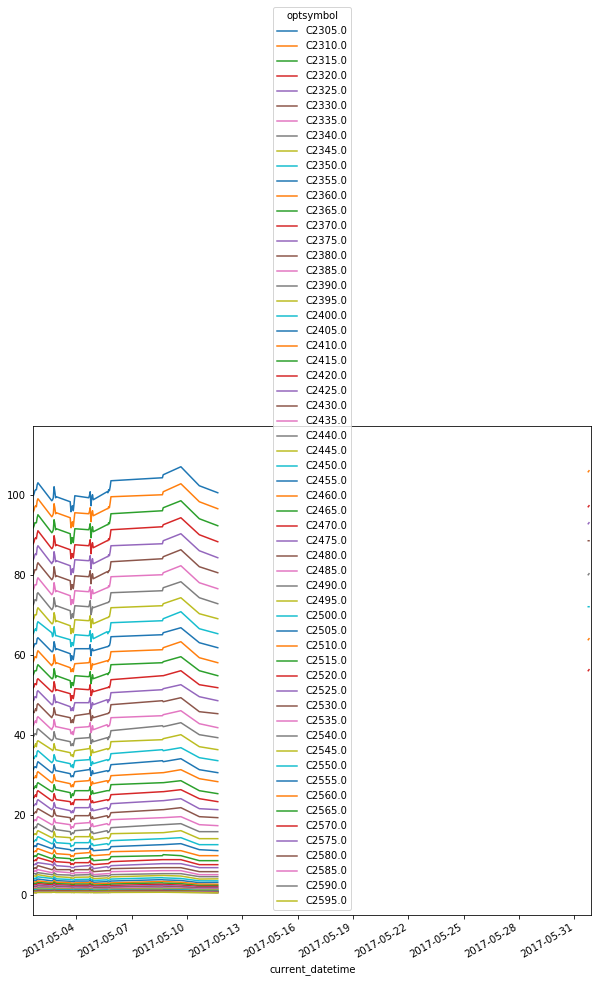

In [26]:
df3['2017-05'].plot(figsize=(10,10))

In [54]:
df2 = df1[(df1['right'] == "C") & (df1['strike'].astype(float) == 2300.0)].dropna(subset=['lastPrice'])

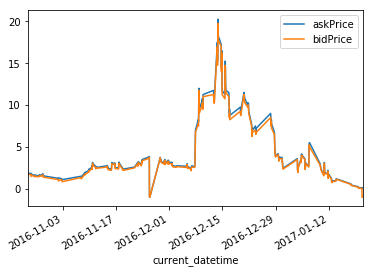

In [55]:

x_col = 'current_datetime'
y_cols = ['askPrice','bidPrice']
df2=df2.loc[:,[x_col] + y_cols].dropna()
df2.loc[:,y_cols] \
    = df2.loc[:,y_cols].apply(pd.to_numeric, errors='coerce')
df2.loc[:,x_col]=pd.to_datetime(df2.loc[:,x_col], format="%Y%m%d%H%M%S")
df2.index = df2[x_col]
del df2[x_col]
df2.plot()

In [56]:
df2

,askPrice,bidPrice
current_datetime,,
2016-10-24 21:52:07,1.85,1.75
2016-10-25 15:52:03,1.85,1.70
2016-10-25 16:52:05,1.60,1.50
2016-10-25 17:52:05,1.75,1.65
2016-10-25 18:52:07,1.80,1.65
2016-10-25 19:52:06,1.70,1.60
2016-10-25 20:52:07,1.70,1.60
2016-10-25 21:52:08,1.70,1.60
2016-10-26 16:52:05,1.60,1.45
